In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table(r"C:\Users\Vatsal\Desktop\projects\Data Sets\Self\daily-total-female-births.txt", sep=",")
print(data.shape)
data.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
data.isnull().sum()

Date      0
Births    0
dtype: int64

In [4]:
df = pd.DataFrame(data)

In [5]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


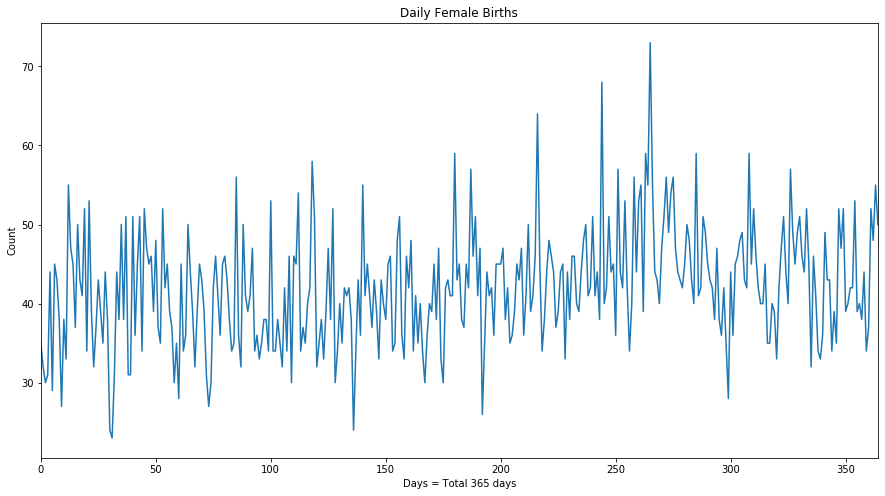

In [6]:
df['Births'].plot(figsize=(15,8))
plt.title('Daily Female Births')
plt.xlabel('Days = Total 365 days')
plt.ylabel('Count');
plt.show()

In [7]:
df = df.groupby('Date')['Births'].sum().reset_index()
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [8]:
df = df.set_index('Date')
df.index

Index(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04', '1959-01-05',
       '1959-01-06', '1959-01-07', '1959-01-08', '1959-01-09', '1959-01-10',
       ...
       '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25', '1959-12-26',
       '1959-12-27', '1959-12-28', '1959-12-29', '1959-12-30', '1959-12-31'],
      dtype='object', name='Date', length=365)

In [9]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [10]:
y = df['Births']

In [11]:
y['1959':]

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

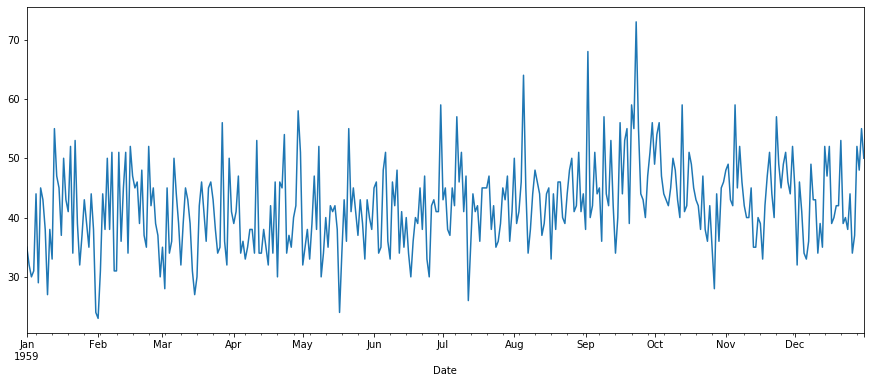

In [12]:
y.plot(figsize=(15, 6))
plt.show()

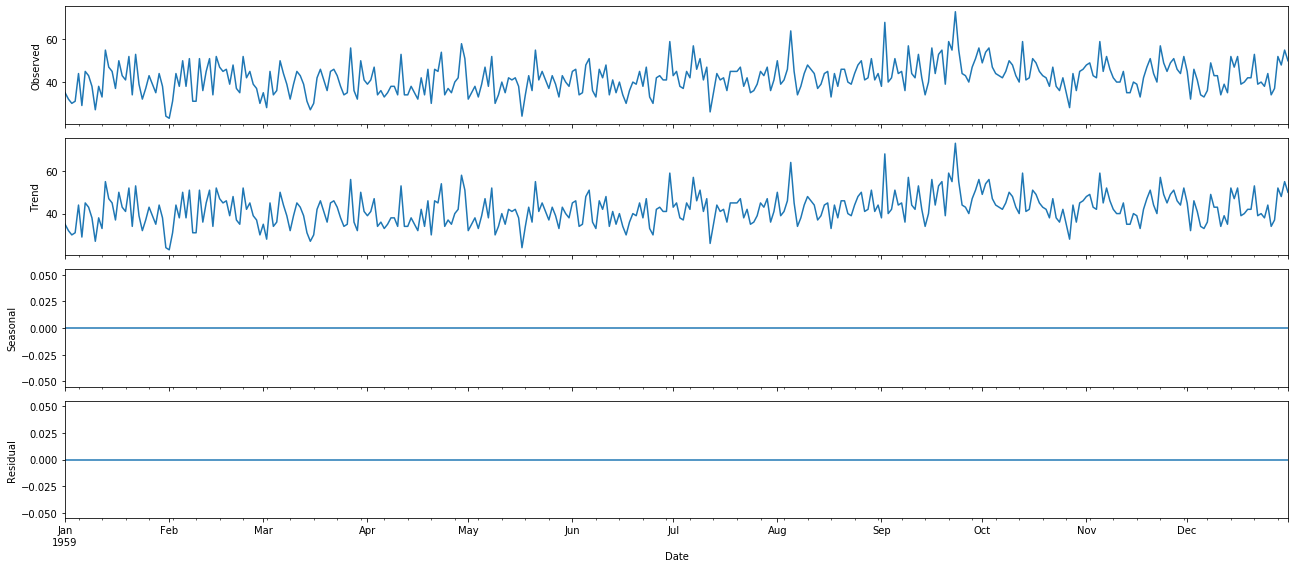

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=1)
fig = decomposition.plot()
plt.show()

In [14]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3766.9589363881933
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3321.8585275375217
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2650.1615104833627
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2345.2210739666757
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2659.1529303166435
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2429.744693523666
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2442.8617522507598
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2347.714762639226
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3388.874643172073
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3078.26841622103
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2634.512818928548
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2330.4964236921705
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2649.83589210812
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2416.914820988126
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2434.873322810723
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2332.268878546211
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2642.388281424601
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2549.6020117927055
ARIM

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1310      0.060      2.165      0.030       0.012       0.250
ma.L1         -0.9616      0.019    -50.939      0.000      -0.999      -0.925
ma.S.L12      -1.0000     67.967     -0.015      0.988    -134.214     132.214
sigma2        49.2389   3346.968      0.015      0.988   -6510.698    6609.176


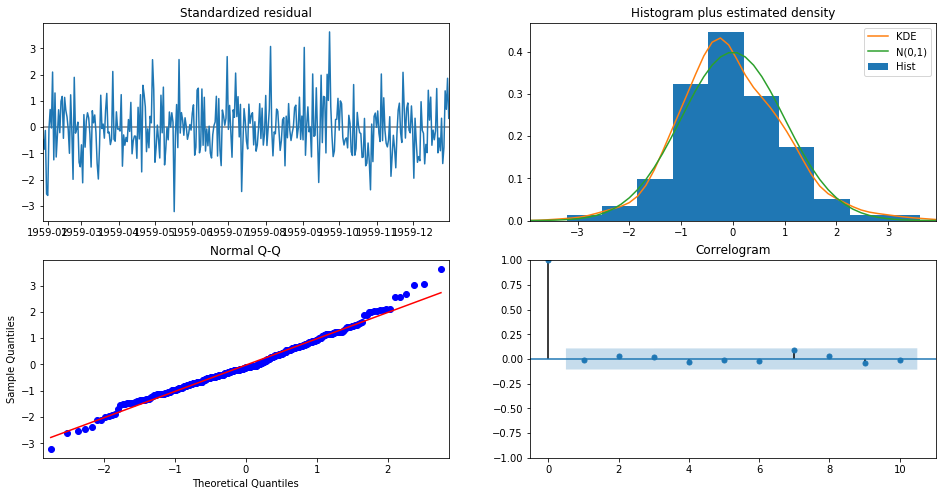

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

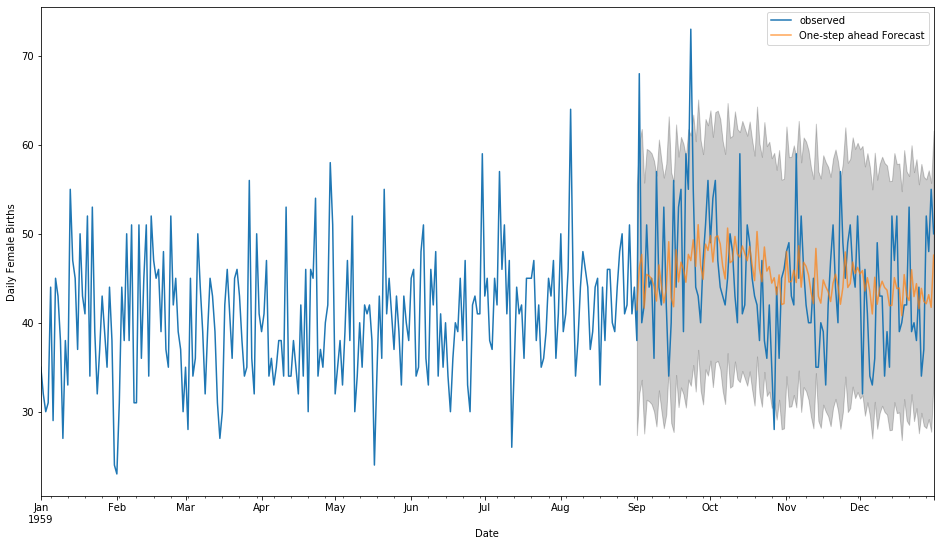

In [17]:
pred = results.get_prediction(start=pd.to_datetime('1959-09-1'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1959':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 9))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Female Births')
plt.legend()
plt.show()

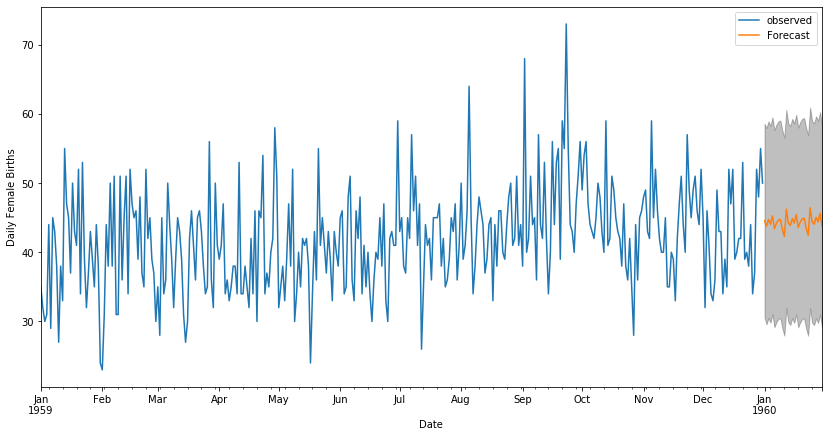

In [18]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Female Births')
plt.legend()
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['1959-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error (MSE) of our forecasts is 56.98
The Root Mean Squared Error (RMSE) of our forecasts is 7.55


In [20]:
pred_ci

,lower Births,upper Births
1960-01-01,30.593031,58.561360
1960-01-02,29.598355,57.966655
1960-01-03,30.512537,58.931627
1960-01-04,29.823185,58.271824
1960-01-05,31.041898,59.517699
1960-01-06,29.161681,57.664317
1960-01-07,29.914923,58.444329
1960-01-08,30.368255,58.924401
1960-01-09,30.464281,59.040184
1960-01-10,28.983269,57.586573


In [21]:
output_data = pd.DataFrame(pred_ci)
output_data.head()

,lower Births,upper Births
1960-01-01,30.593031,58.561360
1960-01-02,29.598355,57.966655
1960-01-03,30.512537,58.931627
1960-01-04,29.823185,58.271824
1960-01-05,31.041898,59.517699


In [22]:
output_data['mean_value']=output_data.mean(axis=1)
output_data.head(10)

,lower Births,upper Births,mean_value
1960-01-01,30.593031,58.561360,44.577195
1960-01-02,29.598355,57.966655,43.782505
1960-01-03,30.512537,58.931627,44.722082
1960-01-04,29.823185,58.271824,44.047505
1960-01-05,31.041898,59.517699,45.279798
1960-01-06,29.161681,57.664317,43.412999
1960-01-07,29.914923,58.444329,44.179626
1960-01-08,30.368255,58.924401,44.646328
1960-01-09,30.464281,59.040184,44.752233
1960-01-10,28.983269,57.586573,43.284921


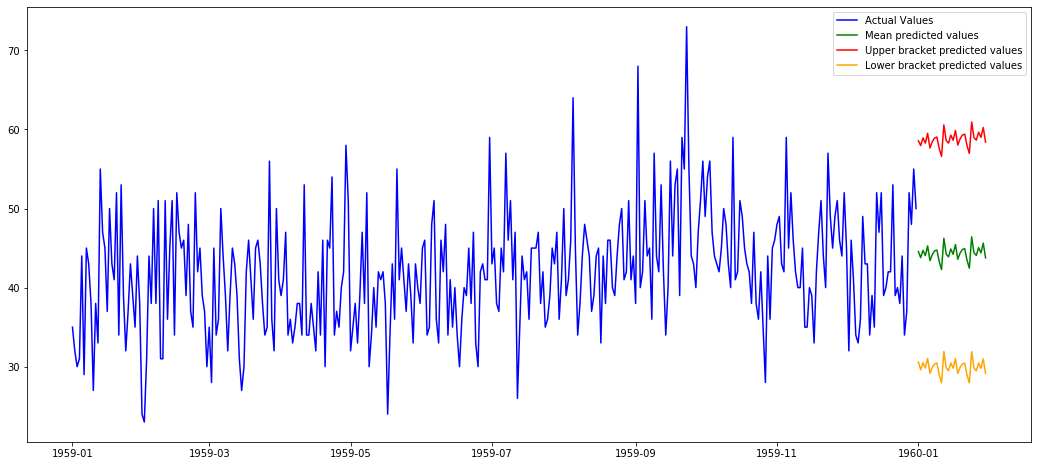

In [23]:
plt.plot(y,'blue' , label='Actual Values')
plt.plot(output_data['mean_value'],'green', label='Mean predicted values')
plt.plot(output_data['upper Births'],'red', label = 'Upper bracket predicted values')
plt.plot(output_data['lower Births'],'orange', label = 'Lower bracket predicted values')
plt.legend(loc='best')
plt.show()

In [24]:
output_data.to_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Output_Daily_Female_Birth.csv')